<a href="https://colab.research.google.com/github/mrcuny/python_assignment/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

In [ ]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

#plotly or other graphing library

In [ ]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
#boston = ds.load_boston()
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [ ]:
# Create a DataFrame with the feature data and column headings
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a column for the target variable
df['target'] = iris.target

# Get the first 5 rows of the DataFrame
first_five_rows = df.head()

# Get a list of target names
target_names = iris.target_names.tolist()

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [ ]:
# Create a kNN model with neighbors=5
knn_model = KNN(n_neighbors=5)

# Fit the model to the iris data
knn_model.fit(iris.data, iris.target)

# Define new observations
new_observations = [[6.2, 3.1, 5.1, 1.8], [5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2]]

# Predict the category of the new observations
predicted_targets = knn_model.predict(new_observations)

# Get the target names of each prediction
target_names = iris.target_names[predicted_targets]

# Print the target names of each prediction
print(target_names)

['virginica' 'setosa' 'setosa']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [ ]:
def knn_accuracy(split, neighbors):
    # Load iris dataset
    #iris = load_iris()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size=split, random_state=42)

    # Create a kNN model with the specified number of neighbors
    knn_model = KNN(n_neighbors=neighbors)

    # Fit the model to the training data
    knn_model.fit(X_train, y_train)

    # Predict the categories of the test data
    y_pred = knn_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

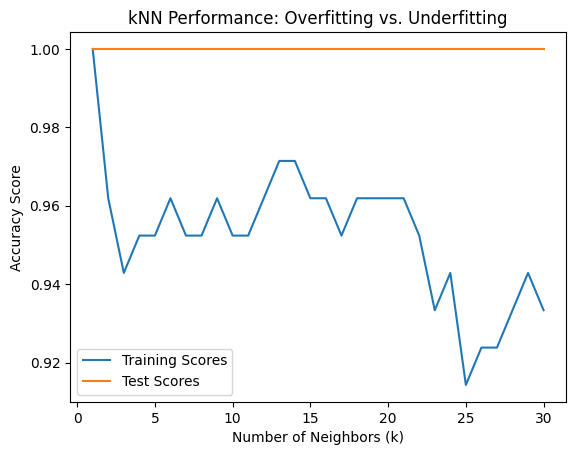

In [ ]:
# Split iris dataset into training and test sets
X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size=0.3, random_state=42)

# Define range of neighbor (k) values
k_values = np.arange(1, 31)

# Define empty lists to store training and test accuracy scores
train_scores = []
test_scores = []

# Iterate through the range of neighbor values and fit the model
for k in k_values:
    knn_model = KNN(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Get the training and test accuracy scores
    train_score = knn_model.score(X_train, y_train)
    test_score = knn_model.score(X_test, y_test)
    
    # Append the scores to the corresponding lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the training and test accuracy scores for each k value
plt.plot(k_values, train_scores, label='Training Scores')
plt.plot(k_values, test_scores, label='Test Scores')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('kNN Performance: Overfitting vs. Underfitting')
plt.legend()
plt.show()

**Q5** 

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [ ]:
from sklearn.datasets import fetch_openml
# Load Boston dataset
boston = fetch_openml(name='boston')


# Load Boston dataset
#boston = load_boston()

# Create a DataFrame with the data and feature names as column names
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Create a separate DataFrame with the target values
boston_target = pd.DataFrame(boston.target, columns=['MEDV'])

# Calculate the average of AGE and MEDV
avg_age = boston_df['AGE'].mean()
avg_medv = boston_target['MEDV'].mean()

# Get the target as NumPy values
target_np = boston_target.to_numpy()

# Return the results
print("Average AGE: {:.2f}".format(avg_age))
print("Average MEDV: {:.2f}".format(avg_medv))
print("Target as NumPy values: \n", target_np)

Average AGE: 68.57
Average MEDV: 22.53
Target as NumPy values: 
 [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

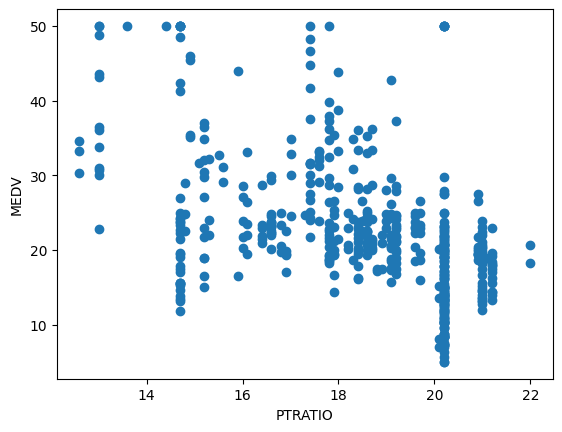

In [ ]:
#boston = ds.load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_target_df = pd.DataFrame(data=boston['target'], columns=['MEDV'])
ptratio_numpy = boston_df['PTRATIO'].values
medv_numpy = boston_target_df['MEDV'].values

plt.scatter(ptratio_numpy, medv_numpy)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

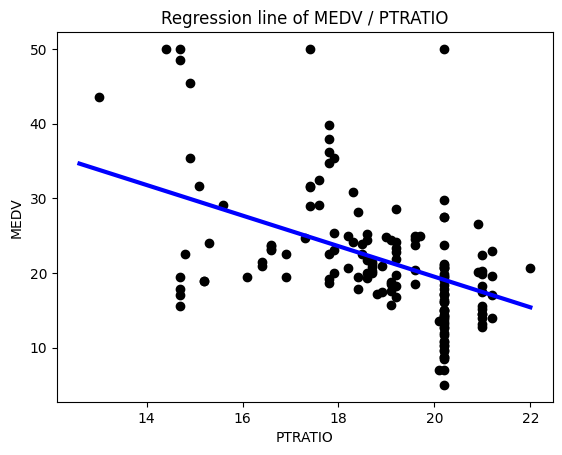

In [ ]:
# Convert the dataset into a DataFrame
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV'] = boston.target

# Extract the features and target variable
X = df_boston['PTRATIO'].values.reshape(-1,1)
y = df_boston['MEDV'].values.reshape(-1,1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
reg_model = lm.LinearRegression()

# Fit the model with the training data
reg_model.fit(X_train, y_train)

# Generate prediction X values from min to max PTRATIO using np.linspace
X_pred = np.linspace(X.min(), X.max(), num=100).reshape(-1,1)

# Predict the target values for the X values
y_pred = reg_model.predict(X_pred)

# Plot the regression line using matplotlib
plt.scatter(X_test, y_test, color='black')
plt.plot(X_pred, y_pred, color='blue', linewidth=3)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.title('Regression line of MEDV / PTRATIO')
plt.show()

# Return back the regression prediction space and regression predicted values
reg_pred_space = X_pred
reg_pred_values = y_pred